## Reto 3: Tablas de contingencia

### 1. Objetivos:
    - Aprender a generar tablas de contingencia utilizando múltiples variables categóricas.

---
    
### 2. Desarrollo:

En este Reto vamos a volver a utilizar el dataset 'melbourne_housing-clean.csv'. Nuestro objetivo será segmentar nuestros datos usando 2 o 3 variables categóricas y luego realizar algunas visualizaciones. Elige el Reto a) o b) y sigue las instrucciones.

### a) Segmentando por tipo y número de cuartos

La primera parte consiste en lo siguiente:

1. Crea una tabla de contingencia usando como índice la variable 'type' y para las columnas la variable 'rooms'.
2. Crea una gráfica de barras para cada uno de los índices ('h', 't', 'u') donde el eje x sean las columnas de la tabla de contingencia.
3. Agrega los títulos y anotaciones necesarias.
4. Describe las similitudes y las diferencias de las distribuciones de las 3 gráficas.

In [2]:
import pandas as  pd
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto melbourne_housing-clean.csv',index_col=0)

In [5]:
df.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


1. Crea una tabla de contingencia usando como índice la variable 'type' y para las columnas la variable 'rooms'.

In [6]:
crosstab = pd.crosstab(df['type'], df['rooms'])
crosstab

rooms,1,2,3,4,5,6,7,8
type,,,,,,,,
h,54,1261,3912,1991,475,54,9,6
t,9,299,575,138,4,0,0,0
u,582,1829,429,17,0,1,0,1


2. Crea una gráfica de barras para cada uno de los índices ('h', 't', 'u') donde el eje x sean las columnas de la tabla de contingencia.

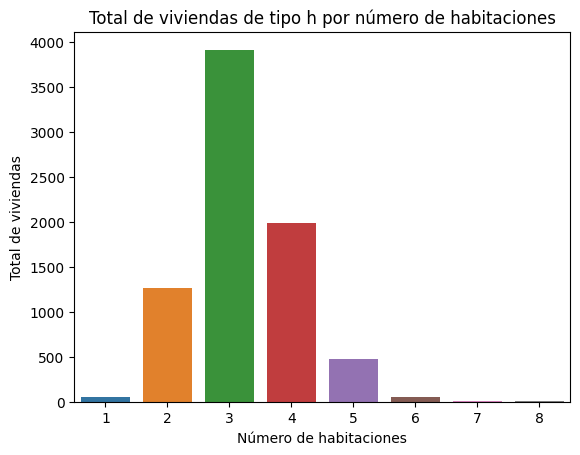

In [41]:
bar0 = sns.barplot(x=crosstab.columns, y=crosstab.iloc[0]);
bar0.set_title('Total de viviendas de tipo '+crosstab.index[0]+' por número de habitaciones');
bar0.set(ylabel='Total de viviendas', xlabel="Número de habitaciones");

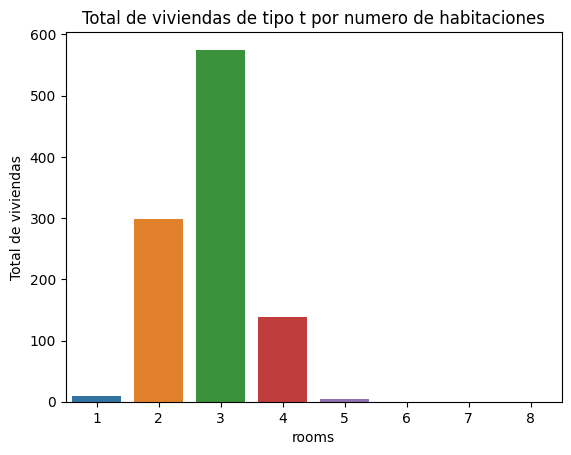

In [36]:
bar1 = sns.barplot(x=crosstab.columns, y=crosstab.iloc[1]);
bar1.set_title('Total de viviendas de tipo '+crosstab.index[1]+' por número de habitaciones');
bar1.set(ylabel='Total de viviendas', xlabel="Número de habitaciones");

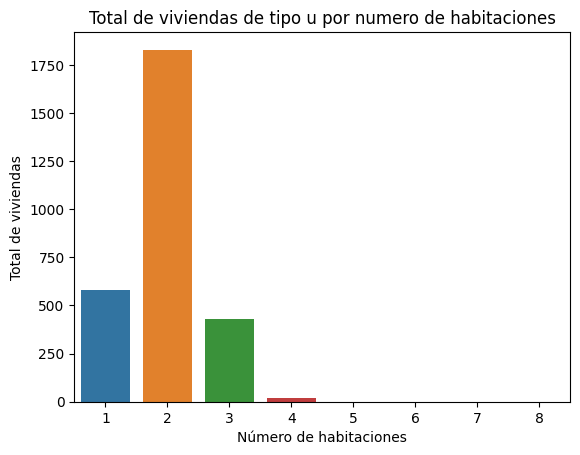

In [40]:
bar2 = sns.barplot(x=crosstab.columns, y=crosstab.iloc[2]);
bar2.set_title('Total de viviendas de tipo '+crosstab.index[2]+' por número de habitaciones');
bar2.set(ylabel='Total de viviendas', xlabel="Número de habitaciones");

### b) Segmentando por región, tipo y número de cuartos

Ahora vamos a hacer una triple segmentación. Realiza los siguientes pasos:

1. Crea una tabla de contingencia donde el índice sea la variable 'region_name' y las columnas tengan un doble nivel con las variables 'type' y 'rooms'.
2. Usa el método `stack` para convertir el nivel de columnas 'type' en un segundo nivel para el índice.
3. Genera 4 gráficas donde compares las distribuciones de cantidad de cuartos para el tipo de propiedad 'h' ('house') en las regiones 'Eastern Metropolitan', 'Northern Metropolitan', 'Southern Metropolitan' y 'Western Metropolitan'. Tendrás que acceder a cada `Serie` usando una tupla para indicar los valores de los dos niveles del índice.
4. Anota tus gráficas adecuadamente.
5. Describe las similitudes y diferencias entre las 4 gráficas.

1. Crea una tabla de contingencia donde el índice sea la variable 'region_name' y las columnas tengan un doble nivel con las variables 'type' y 'rooms'.

In [43]:
ct2 = pd.crosstab(df['region_name'], [df['type'],df['rooms']])
ct2

type                         h                                 t            \
rooms                        1    2     3    4    5   6  7  8  1    2    3   
region_name                                                                  
Eastern Metropolitan         4   83   396  292   77   8  1  2  0   23   60   
Eastern Victoria             0    2    13   17    1   0  0  0  0    0    0   
Northern Metropolitan       23  539  1237  449   76   6  2  0  6  134  139   
Northern Victoria            0    2    12    5    1   1  0  0  0    0    0   
South-Eastern Metropolitan   0    8   123   74   14   5  0  0  0    3   13   
Southern Metropolitan       14  366  1028  704  217  23  5  3  3   72  233   
Western Metropolitan        13  260  1090  443   89  11  1  1  0   67  130   
Western Victoria             0    1    13    7    0   0  0  0  0    0    0   

type                                 u                     
rooms                        4  5    1    2    3  4  6  8  
region_name                                                
Eastern Metropolitan        18  1    9   97   48  5  0  0  
Eastern Victoria             0  0    0    2    1  0  0  0  
Northern Metropolitan       10  1  196  499   98  2  0  1  
Northern Victoria            1  0    0    0    0  0  0  0  
South-Eastern Metropolitan   4  0    2   19    7  0  0  0  
Southern Metropolitan       78  0  311  968  192  7  0  0  
Western Metropolitan        27  2   64  243   83  3  1  0  
Western Victoria             0  0    0    1    0  0  0  0

2. Usa el método `stack` para convertir el nivel de columnas 'type' en un segundo nivel para el índice.

In [44]:
region_name_stack = ct2.stack(level=0)
region_name_stack

rooms                              1    2     3    4      5     6    7    8
region_name                type                                            
Eastern Metropolitan       h       4   83   396  292   77.0   8.0  1.0  2.0
                           t       0   23    60   18    1.0   NaN  NaN  NaN
                           u       9   97    48    5    NaN   0.0  NaN  0.0
Eastern Victoria           h       0    2    13   17    1.0   0.0  0.0  0.0
                           t       0    0     0    0    0.0   NaN  NaN  NaN
                           u       0    2     1    0    NaN   0.0  NaN  0.0
Northern Metropolitan      h      23  539  1237  449   76.0   6.0  2.0  0.0
                           t       6  134   139   10    1.0   NaN  NaN  NaN
                           u     196  499    98    2    NaN   0.0  NaN  1.0
Northern Victoria          h       0    2    12    5    1.0   1.0  0.0  0.0
                           t       0    0     0    1    0.0   NaN  NaN  NaN
                           u       0    0     0    0    NaN   0.0  NaN  0.0
South-Eastern Metropolitan h       0    8   123   74   14.0   5.0  0.0  0.0
                           t       0    3    13    4    0.0   NaN  NaN  NaN
                           u       2   19     7    0    NaN   0.0  NaN  0.0
Southern Metropolitan      h      14  366  1028  704  217.0  23.0  5.0  3.0
                           t       3   72   233   78    0.0   NaN  NaN  NaN
                           u     311  968   192    7    NaN   0.0  NaN  0.0
Western Metropolitan       h      13  260  1090  443   89.0  11.0  1.0  1.0
                           t       0   67   130   27    2.0   NaN  NaN  NaN
                           u      64  243    83    3    NaN   1.0  NaN  0.0
Western Victoria           h       0    1    13    7    0.0   0.0  0.0  0.0
                           t       0    0     0    0    0.0   NaN  NaN  NaN
                           u       0    1     0    0    NaN   0.0  NaN  0.0

3. Genera 4 gráficas donde compares las distribuciones de cantidad de cuartos para el tipo de propiedad 'h' ('house') en las regiones 'Eastern Metropolitan', 'Northern Metropolitan', 'Southern Metropolitan' y 'Western Metropolitan'. Tendrás que acceder a cada `Serie` usando una tupla para indicar los valores de los dos niveles del índice.

In [45]:
x_em = region_name_stack.loc[('Eastern Metropolitan','h')].index
y_em = region_name_stack.loc[('Eastern Metropolitan','h')]
y_em

rooms
1      4.0
2     83.0
3    396.0
4    292.0
5     77.0
6      8.0
7      1.0
8      2.0
Name: (Eastern Metropolitan, h), dtype: float64

In [46]:
x_nm = region_name_stack.loc[('Northern Metropolitan','h')].index
y_nm = region_name_stack.loc[('Northern Metropolitan','h')]

In [47]:
x_sm = region_name_stack.loc[('Southern Metropolitan','h')].index
y_sm = region_name_stack.loc[('Southern Metropolitan','h')]

In [48]:
x_wm = region_name_stack.loc[('Western Metropolitan','h')].index
y_wm = region_name_stack.loc[('Western Metropolitan','h')]

<Axes: xlabel='rooms', ylabel="('Northern Metropolitan', 'h')">

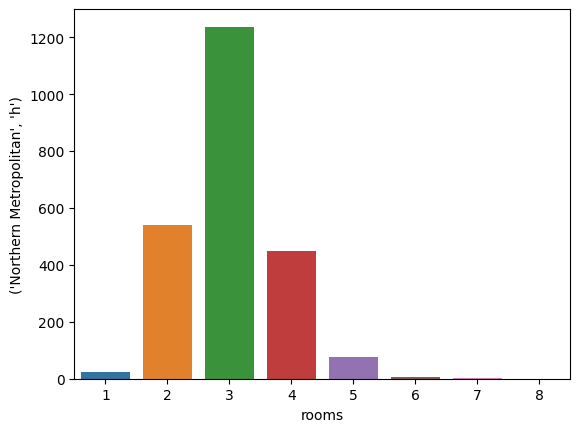

In [51]:
sns.barplot(x=x_nm,y=y_nm)

<Axes: xlabel='rooms', ylabel="('Eastern Metropolitan', 'h')">

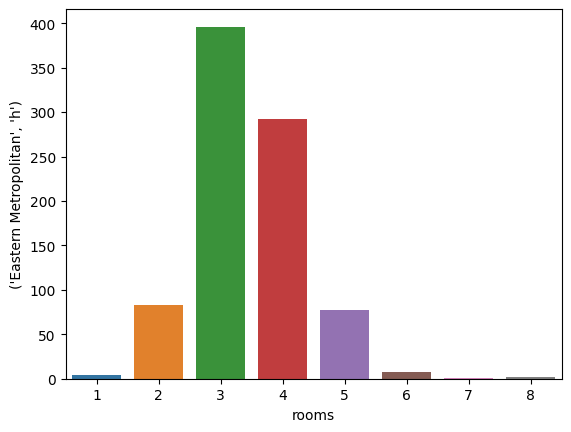

In [26]:
sns.barplot(x=x_em,y=y_em)

<Axes: xlabel='rooms', ylabel="('Western Metropolitan', 'h')">

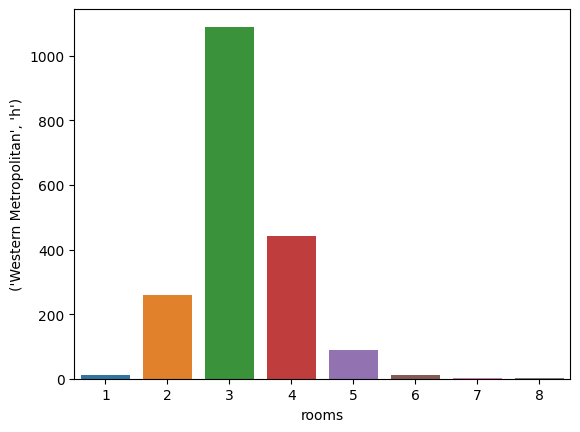

In [27]:
sns.barplot(x=x_wm,y=y_wm)

<Axes: xlabel='rooms', ylabel="('Southern Metropolitan', 'h')">

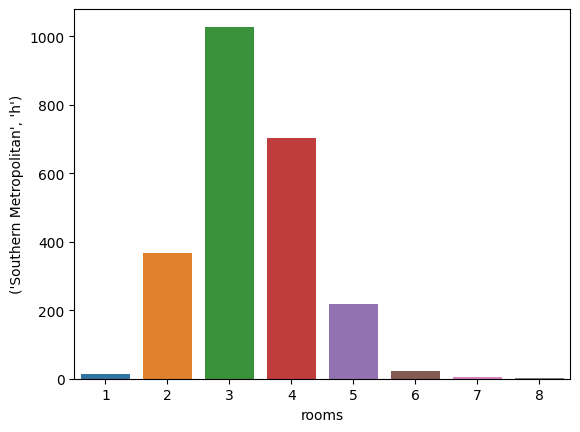

In [28]:
sns.barplot(x=x_sm,y=y_sm)

<details><summary>Solución</summary>

```python
df = pd.read_csv('../../Datasets/melbourne_housing-clean.csv', index_col=0)
    
type_rooms = pd.crosstab(df['type'], df['rooms'])
sns.barplot(type_rooms.loc['h'].index, type_rooms.loc['h'])
sns.barplot(type_rooms.loc['t'].index, type_rooms.loc['t'])
sns.barplot(type_rooms.loc['u'].index, type_rooms.loc['u'])
    
regionname_type_rooms = pd.crosstab(df['region_name'], [df['type'], df['rooms']])
regionname_type_rooms_stacked = regionname_type_rooms.stack(level=0)
sns.barplot(regionname_type_rooms_stacked.loc[('Eastern Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Eastern Metropolitan', 'h')])
sns.barplot(regionname_type_rooms_stacked.loc[('Western Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Western Metropolitan', 'h')])
sns.barplot(regionname_type_rooms_stacked.loc[('Northern Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Northern Metropolitan', 'h')])
sns.barplot(regionname_type_rooms_stacked.loc[('Southern Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Southern Metropolitan', 'h')])
```
    
</details>